Data Pre-Processing


In [1]:
from google.colab import files
import pandas as pd
import io
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
!pip install lightgbm
import lightgbm as lgb
!pip install catboost
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [2]:
uploaded = files.upload()

Saving Real Estate Data V21.csv to Real Estate Data V21.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['Real Estate Data V21.csv']))
print(df)

                                                    Name  \
0                                       Casagrand ECR 14   
1                  Ramanathan Nagar, Pozhichalur,Chennai   
2                                            DAC Prapthi   
3                Naveenilaya,Chepauk, Triplicane,Chennai   
4                               VGN Spring Field Phase 1   
...                                                  ...   
14523      Krishna Park Extension, Tilak Nagar,New Delhi   
14524                   Rawta, Jaffarpur Kalan,New Delhi   
14525                Rani Garden, Geeta Colony,New Delhi   
14526  Lig flat rohini,Sector 16E, Sector 16 Rohini,N...   
14527               Sector 3B, Sector 3 Rohini,New Delhi   

                                          Property Title     Price  \
0      4 BHK Flat for sale in Kanathur Reddikuppam, C...  ₹1.99 Cr   
1      10 BHK Independent House for sale in Pozhichal...  ₹2.25 Cr   
2          3 BHK Flat for sale in West Tambaram, Chennai   ₹1.0 Cr   

In [4]:
df.columns

Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Description', 'Baths', 'Balcony'],
      dtype='object')

In [5]:
df.rename(columns={'Property Title':'Property_Title'},inplace=True)

In [6]:
df[['First','Last','3','4','5','6','7','8','9','10','11','12','13','14']] = df.Property_Title.str.split(expand=True)

In [7]:
df.head()

,Name,Property_Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,First,...,5,6,7,8,9,10,11,12,13,14
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,4,...,sale,in,Kanathur,"Reddikuppam,",Chennai,None,None,None,None,None
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,10,...,for,sale,in,"Pozhichalur,",Chennai,None,None,None,None,None
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,3,...,sale,in,West,"Tambaram,",Chennai,None,None,None,None,None
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes,7,...,for,sale,in,"Triplicane,",Chennai,None,None,None,None,None
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes,2,...,sale,in,"Avadi,",Chennai,None,None,None,None,None,None


In [8]:
df.columns

Index(['Name', 'Property_Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Description', 'Baths', 'Balcony', 'First', 'Last',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'],
      dtype='object')

In [9]:
df=df.drop(columns=['Property_Title','Description','Last','4','5','6','Location','10','11','12','13','14'],axis=1)

In [10]:
df.rename(columns={'3':'Type_Of_House',
                   '7':'Locality_1',
                   '8':'Locality_2',
                   '9':'City'
                   },inplace=True)

In [11]:
df=df[df['Locality_1']!='in' ]

In [12]:
df1=df[(df.Locality_2== 'Hyderabad')]

In [13]:
df2=df[(df.City == 'Hyderabad')]

In [14]:
df2['Final_Locality'] = df2[['Locality_1', 'Locality_2']].agg(' '.join, axis=1)

<ipython-input-14-875543b08fe8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Final_Locality'] = df2[['Locality_1', 'Locality_2']].agg(' '.join, axis=1)


In [15]:
df2=df2.drop(['Locality_1','Locality_2'],axis=1)


In [16]:
df2['Final_Locality'].head(2)

,Final_Locality
6111,"Neeladri Nagar,"
6118,"Hyder Nagar,"


In [17]:
df1=df1.drop(['City'],axis=1)

In [18]:
df1.rename(columns={'Locality_2':'City'},inplace=True)

In [19]:
df1.columns

Index(['Name', 'Price', 'Total_Area', 'Price_per_SQFT', 'Baths', 'Balcony',
       'First', 'Type_Of_House', 'Locality_1', 'City'],
      dtype='object')

In [20]:
df1.rename(columns={'Locality_1':'Final_Locality'},inplace=True)

In [21]:
frame=[df1,df2]

In [22]:
results=pd.concat(frame)

In [23]:
results.head(2)

,Name,Price,Total_Area,Price_per_SQFT,Baths,Balcony,First,Type_Of_House,Final_Locality,City
6108,Cybercity Marina Skies,₹1.77 Cr,1900,9290.0,3,Yes,3,Flat,"Borabanda,",Hyderabad
6109,Rajapushpa Apartment,₹96.0 L,1791,5360.0,3,Yes,3,Flat,"Attapur,",Hyderabad


In [24]:
df=results

In [25]:
df.shape

(454, 10)

In [26]:
df.isnull().sum()

,0
Name,0
Price,0
Total_Area,0
Price_per_SQFT,0
Baths,0
Balcony,0
First,0
Type_Of_House,0
Final_Locality,0
City,0


In [27]:
df.rename(columns={'First':'BHK'},inplace=True)

In [28]:
def price_changer(price):
  price=str(price)
  input=price[1:]
  print(input)
  if(input[-1]=='L'):
    index1=input.index('L')
    return(float(input[0:index1])*100000)
  elif(input[-1]=='r'):
    index2=input.index('C')
    return(float(input[0:index2])*1000000)
def remove_comma(input):
   if(input.endswith(",")):
     return(input[0:input.index(",")])


In [29]:
df['Price']=df['Price'].apply(price_changer)
df['Final_Locality']=df['Final_Locality'].apply(remove_comma)


1.77 Cr
96.0 L
1.5 Cr
68.0 L
73.88 L
55.0 L
97.0 L
96.89 L
68.0 L
6.5 Cr
2.2 Cr
1.82 Cr
5.25 Cr
85.0 L
65.0 L
90.79 L
11.5 Cr
2.5 Cr
51.0 L
55.0 L
1.78 Cr
1.07 Cr
1.4 Cr
1.05 Cr
45.0 L
89.0 L
5.5 Cr
67.0 L
55.0 L
6.25 Cr
49.0 L
1.9 Cr
1.75 Cr
1.35 Cr
21.5 Cr
68.0 L
50.4 L
1.05 Cr
33.59 L
42.0 L
55.0 L
44.94 L
40.0 L
62.08 L
55.0 L
40.0 L
1.65 Cr
1.24 Cr
4.5 Cr
1.3 Cr
68.0 L
8.5 Cr
1.08 Cr
95.0 L
3.98 Cr
1.5 Cr
2.68 Cr
75.0 L
55.0 L
32.79 L
42.5 L
40.0 L
59.0 L
65.0 L
70.0 L
56.0 L
88.0 L
34.0 L
69.0 L
34.0 L
38.0 L
72.0 L
60.0 L
48.0 L
62.0 L
1.27 Cr
78.0 L
52.0 L
1.0 Cr
53.0 L
48.0 L
76.0 L
56.0 L
45.0 L
92.0 L
69.75 L
61.97 L
43.0 L
1.01 Cr
1.2 Cr
64.0 L
89.0 L
50.0 L
40.0 L
91.0 L
36.5 L
30.0 L
55.0 L
1.0 Cr
66.0 L
1.8 Cr
8.0 Cr
69.0 L
35.0 L
45.0 L
87.0 L
1.1 Cr
1.15 Cr
1.75 Cr
85.25 L
50.0 L
1.6 Cr
47.0 L
55.0 L
70.0 L
1.21 Cr
85.0 L
1.02 Cr
59.0 L
71.0 L
75.0 L
85.0 L
62.0 L
73.0 L
68.0 L
60.0 L
48.0 L
66.0 L
1.25 Cr
90.0 L
92.0 L
60.0 L
96.5 L
2.1 Cr
70.0 L
1.02 Cr
85.0 L
1.25 C

In [30]:
def BHKConvert(bhkstr):
  res=float(bhkstr)
  print(res)
  return res
def inttofloat(input):
  return(float(input))
def roundupbhk(input):
  res1=round(input,1)
  res2=round(input)-res1
  if(res2==0.5 or res2==0.4 or res2==0.6 or res2==-0.5 or res2==-0.4 or res2==-0.6):
    return res1
  else:
    return round(res1)


In [31]:
df.drop(df[df['BHK']=="Studio"].index,inplace=True)

In [32]:
df['BHK']=df['BHK'].apply(BHKConvert)
df['Baths']=df['Baths'].apply(inttofloat)

3.0
3.0
3.0
2.0
3.0
2.0
2.0
3.0
3.0
5.0
4.0
3.0
5.0
2.0
2.0
3.0
4.0
4.0
2.0
3.0
3.0
3.0
3.0
3.0
2.0
2.0
5.0
2.0
2.0
4.0
2.0
4.0
3.0
3.0
5.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
4.0
4.0
3.0
3.0
4.0
3.0
3.0
4.0
3.0
4.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
3.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
3.0
2.0
2.0
3.0
2.0
2.0
3.0
3.0
2.0
2.0
3.0
3.0
2.0
3.0
2.0
2.0
3.0
2.0
2.0
2.0
3.0
2.0
3.0
4.0
3.0
2.0
2.0
2.0
2.0
3.0
3.0
2.0
2.0
3.0
2.0
2.0
3.0
3.0
3.0
2.0
4.0
3.0
3.0
3.0
2.0
2.0
3.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
3.0
4.0
2.0
3.0
3.0
3.0
3.0
2.0
2.0
2.0
3.0
3.0
2.0
3.0
2.0
3.0
2.0
3.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
3.0
3.0
4.0
2.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
2.0
2.0
3.0
3.0
2.0
3.0
2.0
3.0
3.0
3.0
3.0
2.0
3.0
3.0
4.0
3.0
4.0
2.0
4.0
2.0
3.0
3.0
3.0
1.0
2.0
4.0
2.0
4.0
2.0
2.0
3.0
4.0
4.0
4.0
4.0
2.0
3.0
2.0
3.0
2.0
3.0
3.0
2.0
3.0
2.0
2.0
2.0
3.0
2.0
3.0
3.0
3.0
2.0
2.0
3.0
3.0
2.0
3.0
2.0
3.0
2.0
3.0
2.0
2.0
3.0
2.0
3.0
3.0
3.0
3.0
2.0
3.0
2.0
2.0
2.0
2.0


In [33]:
df['Area_Per_BHK']=df['Total_Area']/df['BHK']
df["Bedroom_Bathroom_Ratio"]=df["BHK"]/df["Baths"]
df["Area_Per_Bathroom"]=df["Total_Area"]/df["Baths"]
df['Month'] = [i % 12 + 1 for i in range(len(df))]

In [34]:
import random

In [35]:
years=list(range(2022,2025))
df['Year']=df.apply(lambda row:random.sample(years,1)[0],axis=1)

In [36]:
df['Date']=pd.to_datetime("01-"+df['Month'].astype('str')+"-"+df['Year'].astype('str'),dayfirst=True)

In [37]:
df['Date'].head()

,Date
6108,2023-01-01
6109,2022-02-01
6110,2022-03-01
6112,2024-04-01
6115,2022-05-01


In [38]:
df=df.dropna()

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Type_Of_House']=le.fit_transform(df['Type_Of_House'])
df['City']=le.fit_transform(df['City'])
df['Balcony']=le.fit_transform(df['Balcony'])
df['Final_Locality']=le.fit_transform(df['Final_Locality'])

In [40]:
joblib.dump(le, 'encoder.pkl')

['encoder.pkl']

In [41]:
features=['Total_Area',  'Baths','BHK','Area_Per_BHK','Bedroom_Bathroom_Ratio', 'Area_Per_Bathroom']

In [42]:
scaler=StandardScaler()
df[features]=scaler.fit_transform(df[features])

In [43]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [44]:
df.drop(['Name'],axis=1,inplace=True)

In [45]:
df.set_index('Date',inplace=True)

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([18993., 19113., 19236., 19358., 19478., 19601., 19723., 19844.,
        19967., 20089.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05'),
  Text(19601.0, 0, '2023-09'),
  Text(19723.0, 0, '2024-01'),
  Text(19844.0, 0, '2024-05'),
  Text(19967.0, 0, '2024-09'),
  Text(20089.0, 0, '2025-01')])

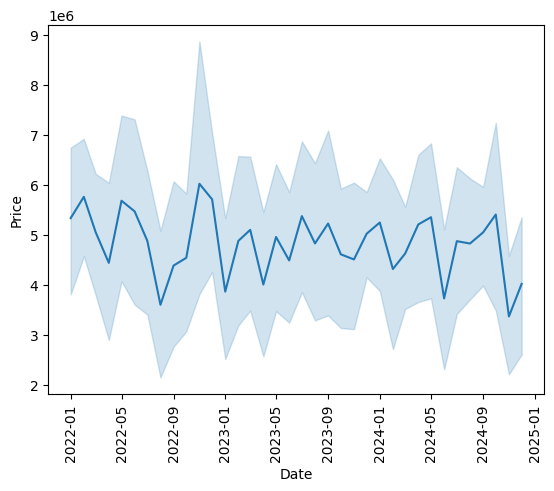

In [47]:
sns.lineplot(x=df.index,y=df['Price'])
plt.xticks(rotation=90)

In [48]:
from statsmodels.tsa.stattools import adfuller

In [49]:
def stationary_test(dataframe,column):
  dataframe['rolling_mean']=dataframe[column].rolling(window=12).mean().shift(1)
  dataframe['rolling_std']=dataframe[column].rolling(window=12).std().shift(1)
  adftest=adfuller(dataframe[column],autolag=None)
  stats=pd.Series(adftest[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  print(stats)
  for key,value in adftest[4].items():
    print('\n Critical Values:')
    print(f'   {key}, {value}')
  dataframe.dropna(inplace=True)
  sns.lineplot(data=dataframe,x=dataframe.index,y=column)
  sns.lineplot(data=dataframe,x=dataframe.index,y='rolling_mean')
  sns.lineplot(data=dataframe,x=dataframe.index,y='rolling_std')
  plt.xticks(rotation=90)
  plt.legend()

Test Statistic                  -4.727800
p-value                          0.000075
Lags Used                       18.000000
Number of Observations Used    435.000000
dtype: float64

 Critical Values:
   1%, -3.4454725477848998

 Critical Values:
   5%, -2.8682072297316794

 Critical Values:
   10%, -2.570321396485665


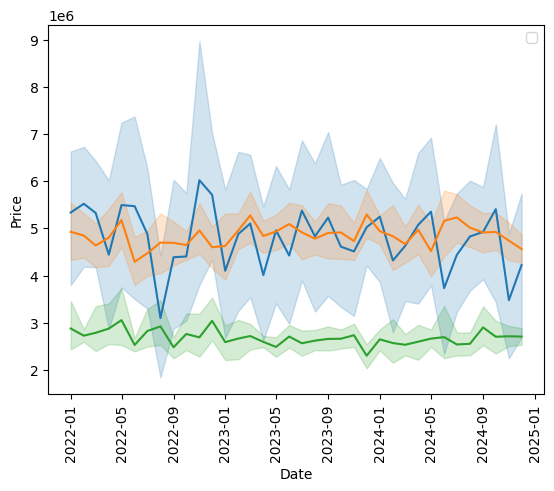

In [50]:
stationary_test(df,'Price')

In [51]:
#differencing
df1=df.copy()
df1['Price_Diff']=df1['Price']-df1['Price'].shift(1)
df1.dropna(inplace=True)


Test Statistic                -7.819840e+00
p-value                        6.715912e-12
Lags Used                      1.800000e+01
Number of Observations Used    4.220000e+02
dtype: float64

 Critical Values:
   1%, -3.44594128742536

 Critical Values:
   5%, -2.868413360220551

 Critical Values:
   10%, -2.570431271085555


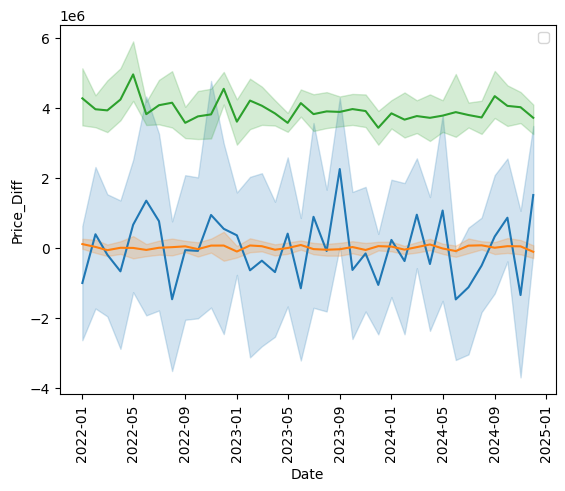

In [52]:
stationary_test(df1,'Price_Diff')

In [53]:
import numpy as np

In [54]:
#log
df2=df.copy()
df2['Price_Log']=np.log(df2['Price'])
df2.dropna(inplace=True)

Test Statistic                  -4.459993
p-value                          0.000232
Lags Used                       18.000000
Number of Observations Used    423.000000
dtype: float64

 Critical Values:
   1%, -3.4459042013025836

 Critical Values:
   5%, -2.8683970525583358

 Critical Values:
   10%, -2.5704225783970176


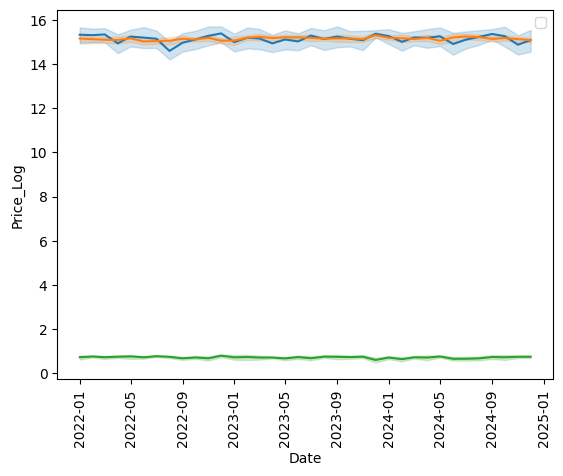

In [55]:
stationary_test(df2,'Price_Log')

In [56]:
#square root
df3=df.copy()
df3['Price_Sqrt']=np.sqrt(df3['Price'])
df3.dropna(inplace=True)

Test Statistic                  -4.437430
p-value                          0.000255
Lags Used                       18.000000
Number of Observations Used    423.000000
dtype: float64

 Critical Values:
   1%, -3.4459042013025836

 Critical Values:
   5%, -2.8683970525583358

 Critical Values:
   10%, -2.5704225783970176


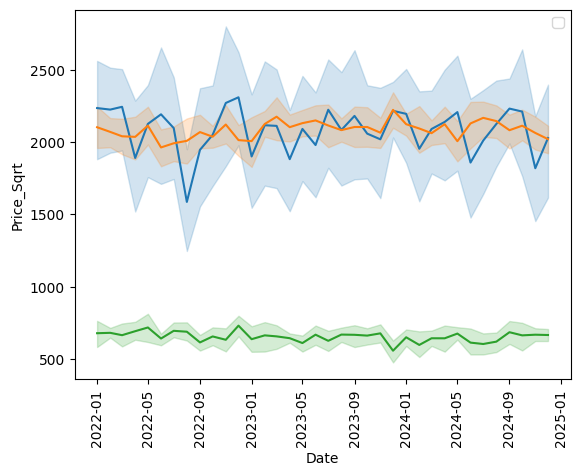

In [57]:
stationary_test(df3,'Price_Sqrt')

In [58]:
#cube root
df4=df.copy()
df4['Price_Sqrt']=np.cbrt(df4['Price'])
df4.dropna(inplace=True)

Test Statistic                  -4.447383
p-value                          0.000244
Lags Used                       18.000000
Number of Observations Used    423.000000
dtype: float64

 Critical Values:
   1%, -3.4459042013025836

 Critical Values:
   5%, -2.8683970525583358

 Critical Values:
   10%, -2.5704225783970176


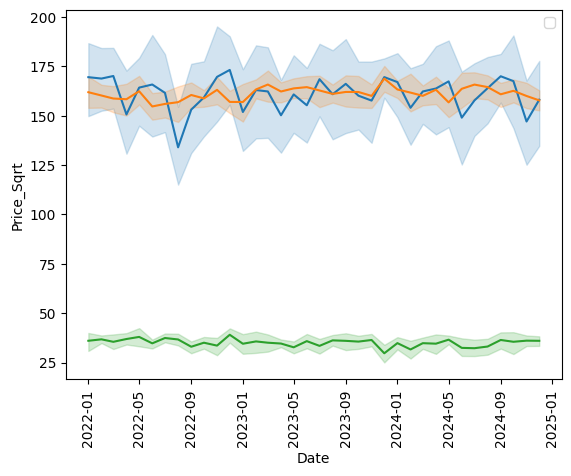

In [59]:
stationary_test(df4,'Price_Sqrt')

In [60]:
#log and sqrt
df5=df.copy()
df5['Price_Log']=np.log(df5['Price'])
df5['Price_Log_Sqrt']=np.sqrt(df5['Price_Log'])
df5.dropna(inplace=True)

Test Statistic                  -4.461172
p-value                          0.000231
Lags Used                       18.000000
Number of Observations Used    423.000000
dtype: float64

 Critical Values:
   1%, -3.4459042013025836

 Critical Values:
   5%, -2.8683970525583358

 Critical Values:
   10%, -2.5704225783970176


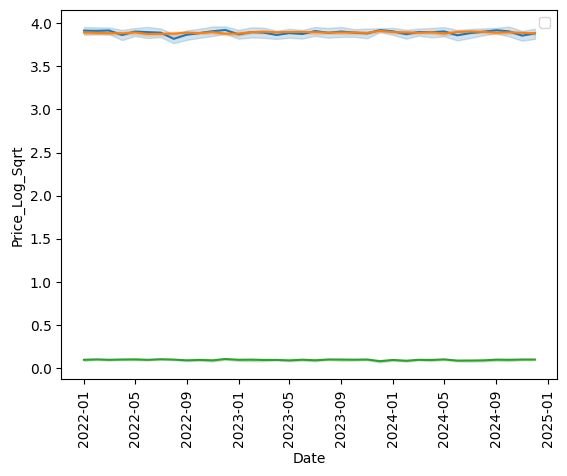

In [61]:
stationary_test(df5,'Price_Log_Sqrt')

In [62]:
#log and shift
df6=df.copy()
df6['Price_Log']=np.log(df6['Price'])
df6['Price_Log_Shift']=df6['Price_Log']-df6['Price_Log'].shift(1)
df6.dropna(inplace=True)

Test Statistic                -7.552472e+00
p-value                        3.162138e-11
Lags Used                      1.800000e+01
Number of Observations Used    4.220000e+02
dtype: float64

 Critical Values:
   1%, -3.44594128742536

 Critical Values:
   5%, -2.868413360220551

 Critical Values:
   10%, -2.570431271085555


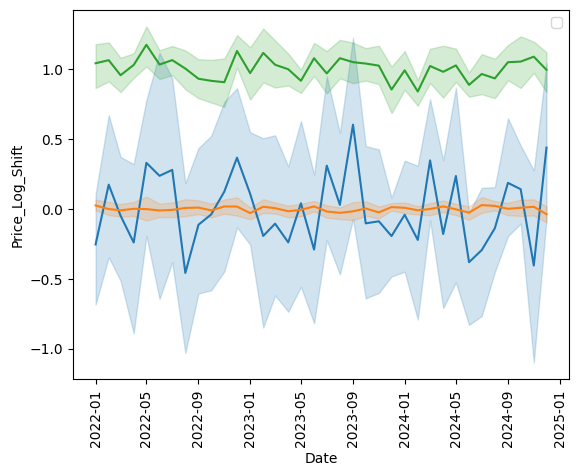

In [63]:
stationary_test(df6,'Price_Log_Shift')

In [64]:
from statsmodels.tsa.arima_model import ARIMA

In [65]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [76]:
df.shape

(442, 16)

In [66]:
df_model=df.copy()
df_model['Price_Log']=np.log(df_model['Price'])
df_model['Price_Log_Sqrt']=np.sqrt(df_model['Price_Log'])
df_model['Price_Diff']=df_model['Price']-df_model['Price'].shift(1)
df_model.dropna(inplace=True)

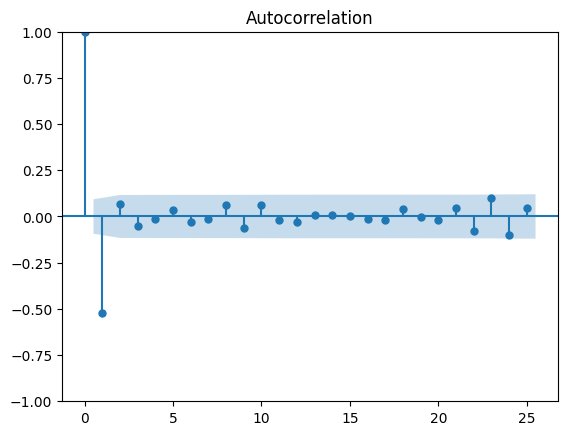

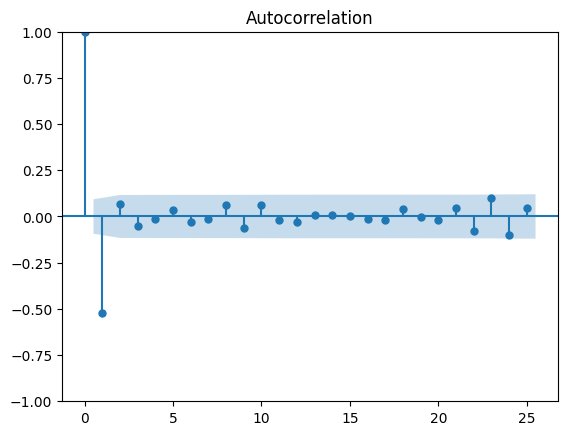

In [67]:
plot_acf(df_model['Price_Diff'],lags=25)

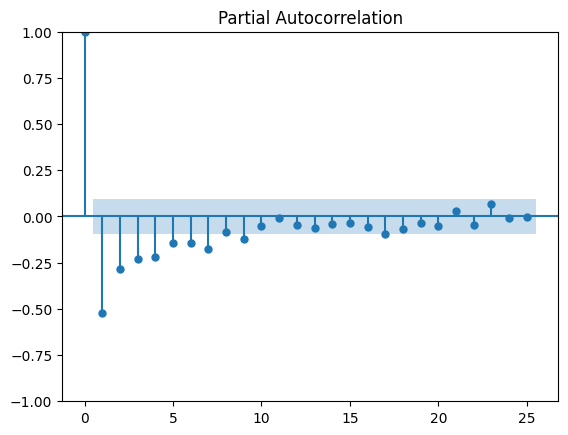

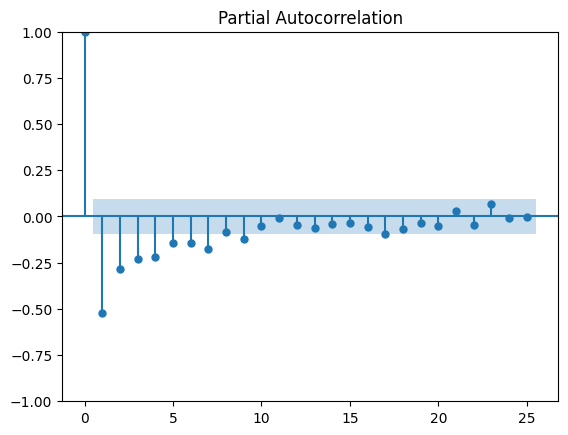

In [68]:
plot_pacf(df_model['Price_Diff'],lags=25)

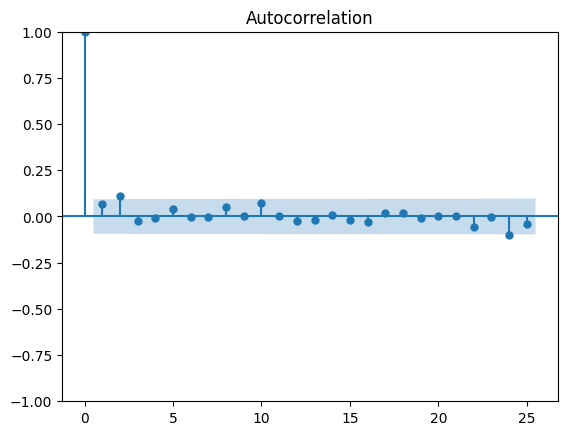

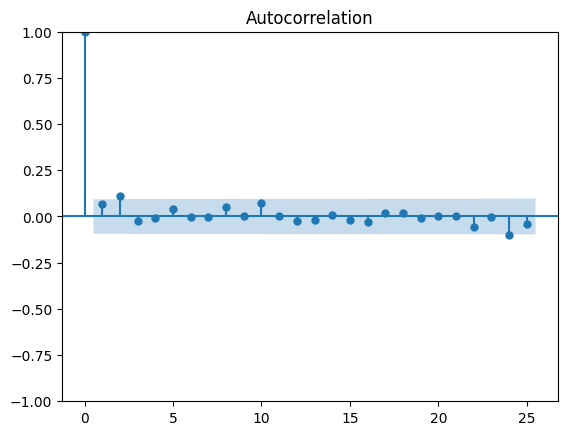

In [69]:
plot_acf(df_model['Price_Log_Sqrt'],lags=25)

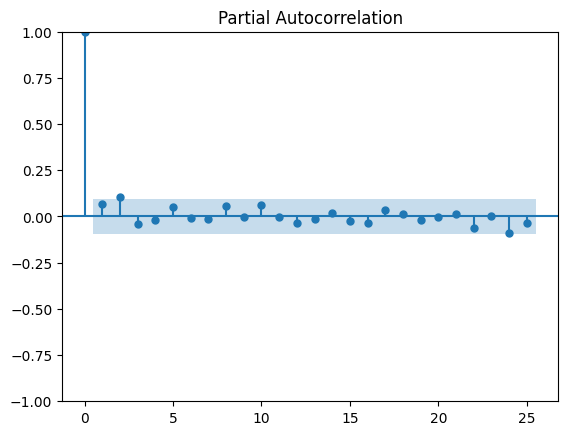

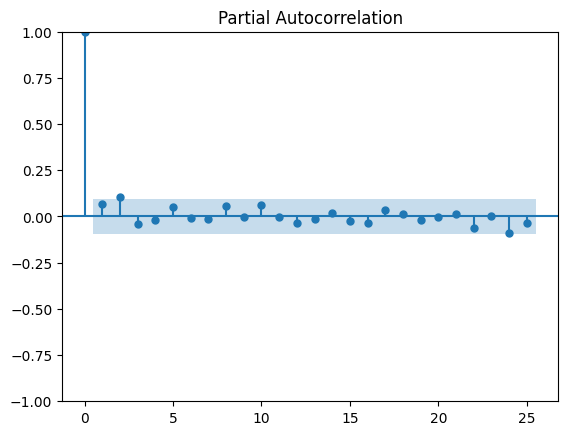

In [70]:
plot_pacf(df_model['Price_Log_Sqrt'],lags=25)

In [71]:
from statsmodels.tsa.arima.model import ARIMA

In [72]:
df.columns

Index(['Price', 'Total_Area', 'Price_per_SQFT', 'Baths', 'Balcony', 'BHK',
       'Type_Of_House', 'Final_Locality', 'City', 'Area_Per_BHK',
       'Bedroom_Bathroom_Ratio', 'Area_Per_Bathroom', 'Month', 'Year',
       'rolling_mean', 'rolling_std'],
      dtype='object')

In [77]:
df_model=df_model.sort_index()
train=df[['Price','Total_Area', 'Baths', 'Balcony', 'BHK','Type_Of_House', 'Final_Locality', 'City']].iloc[:300]
test=df[['Price','Total_Area', 'Baths', 'Balcony', 'BHK','Type_Of_House', 'Final_Locality', 'City']].iloc[300:]
exog_train=train[['Total_Area', 'Baths', 'Balcony', 'BHK','Type_Of_House', 'Final_Locality', 'City']]
exog_test=test[['Total_Area', 'Baths', 'Balcony', 'BHK','Type_Of_House', 'Final_Locality', 'City']]

In [78]:
df_model.dtypes

,0
Price,float64
Total_Area,float64
Price_per_SQFT,float64
Baths,float64
Balcony,int64
BHK,float64
Type_Of_House,int64
Final_Locality,int64
City,int64
Area_Per_BHK,float64


In [106]:
model1=ARIMA(train['Price'],order=(3,1,2))
model1=model1.fit()
arima_pred=model1.predict(start=len(train),end=len(train)+len(test)-1)
test['arimaPredlogsqrt']=arima_pred.values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

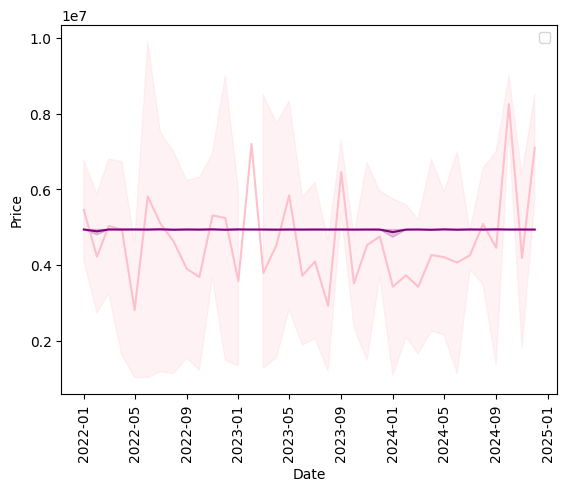

In [107]:
sns.lineplot(data=test.dropna(),x=test.index,y='Price',color="pink")
sns.lineplot(data=test.dropna(),x=test.index,y='arimaPredlogsqrt',color="purple")
plt.xticks(rotation=90)
plt.legend()

In [108]:
from sklearn.metrics import mean_squared_error

In [109]:
np.sqrt(mean_squared_error(test['Price'],test['arimaPredlogsqrt']))

2525321.370127792

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


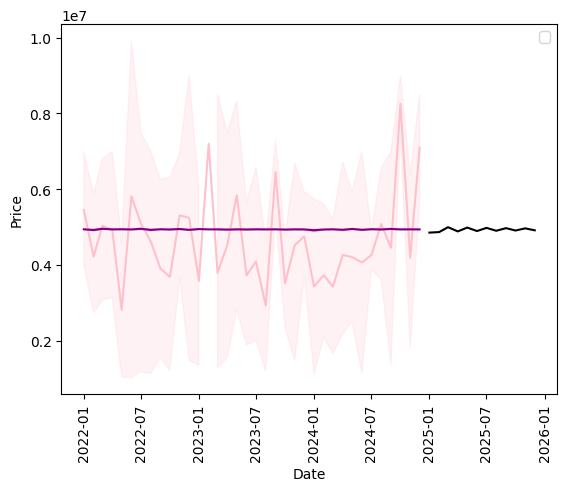

In [105]:
futureDate = pd.DataFrame(pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS'))
futureDate.set_index(pd.to_datetime(futureDate[0], format='%Y-%m-%d'), inplace=True)

# Predict for the length of future dates
#  We'll adjust the index later.
future_preds = model1.predict(start=len(train), end=len(train) + len(futureDate) - 1)

# Create a DataFrame with predictions and the correct future dates
futurePredictions = pd.DataFrame({'ARIMA_Pred': future_preds.values}, index=futureDate.index)

# Plot future predictions
plt.plot(futurePredictions['ARIMA_Pred'],color='black')
sns.lineplot(data=test.dropna(),x=test.index,y='Price',color="pink")
sns.lineplot(data=test.dropna(),x=test.index,y='arimaPredlogsqrt',color="purple")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [110]:
model2=ARIMA(train['Price'],order=(1,1,3))
model2=model2.fit()
arima_pred=model2.predict(start=len(train),end=len(train)+len(test)-1)
test['arimaPreddiff']=arima_pred.values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

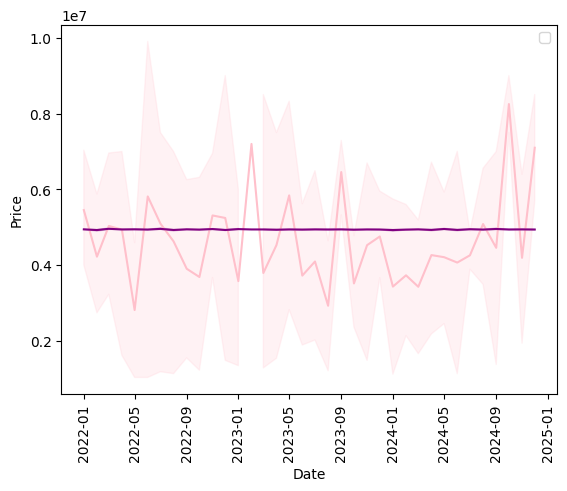

In [111]:
sns.lineplot(data=test.dropna(),x=test.index,y='Price',color="pink")
sns.lineplot(data=test.dropna(),x=test.index,y='arimaPreddiff',color="purple")
plt.xticks(rotation=90)
plt.legend()

In [112]:
np.sqrt(mean_squared_error(test['Price'],test['arimaPreddiff']))

2529068.699492319

Model Building

In [ ]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X,Y,test_size=0.25,random_state=0)
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X,Y,test_size=0.20,random_state=0)

In [ ]:
r=Ridge()
param_grid=[{'alpha':[0.001,0.01,0.1,1,10,100]}]
gsv=GridSearchCV(r,param_grid=param_grid,cv=5)

In [ ]:
model1=gsv.fit(X_train1,Y_train1)
model2=gsv.fit(X_train2,Y_train2)

In [ ]:
print(model1.score(X_test1,Y_test1))
print(model2.score(X_test2,Y_test2))

0.049203448093409485
0.046596664033715984


In [ ]:
lr=LinearRegression()
param_grid=[{'fit_intercept':[True,False],'positive':[True,False]}]
gsv=GridSearchCV(lr,param_grid=param_grid,cv=5)

In [ ]:
model3=gsv.fit(X_train1,Y_train1)
model4=gsv.fit(X_train2,Y_train2)

In [ ]:
print(model3.score(X_test1,Y_test1))
print(model4.score(X_test2,Y_test2))

0.04911331880274672
0.046535477004377324


In [ ]:
dtc=DecisionTreeRegressor(random_state=30)
param_grid=[{'criterion':['absolute_error','squared_error'],
             'max_depth':range(5,10),
             'max_leaf_nodes':range(10,20)}]
gsv = GridSearchCV(dtc, param_grid = param_grid, cv = 5)


In [ ]:
model5=gsv.fit(X_train1,Y_train1)
model6=gsv.fit(X_train2,Y_train2)

In [ ]:
print(model5.score(X_test1,Y_test1))
print(model6.score(X_test2,Y_test2))

0.14231754352753245
0.09021019010494702


In [ ]:
rf=RandomForestRegressor(random_state=30)
param_grid=[{'criterion':['absolute_error','squared_error',"poison"],
             'n_estimators':[100,150,200]}]
gsv = GridSearchCV(rf, param_grid = param_grid, cv = 5)

In [ ]:
model7=gsv.fit(X_train1,Y_train1)
model8=gsv.fit(X_train2,Y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

In [ ]:
print(model7.score(X_test1,Y_test1))
print(model8.score(X_test2,Y_test2))

0.3896016524651187
0.26072297799734634


In [ ]:
gb=GradientBoostingRegressor(random_state=30)
param_grid=[{'n_estimators':[100,150,200],
             'learning_rate':[0.001,0.01,0.1,1,10],
             'max_features':[10,11,12,13,14]}]
gsv=GridSearchCV(gb,param_grid=param_grid,cv=5)

In [ ]:
model9=gsv.fit(X_train1,Y_train1)
model10=gsv.fit(X_train2,Y_train2)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1220: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountere

In [ ]:
print(model9.score(X_test1,Y_test1))
print(model10.score(X_test2,Y_test2))

0.2707893779387568
0.2196364704945616


In [ ]:
gb=XGBRegressor(random_state=30)
param_grid=[{'n_estimators':[100,150,200],
             'learning_rate':[0.001,0.01,0.1,1,10],
             'max_depth':[5,10,15,20]}]
gsv=GridSearchCV(gb,param_grid=param_grid,cv=5)

In [ ]:
model11=gsv.fit(X_train1,Y_train1)
model12=gsv.fit(X_train2,Y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 849, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 1204, in r2_score
    _, y_true, y_pred, multioutput = _check_reg_targets(
  

In [ ]:
print(model11.score(X_test1,Y_test1))
print(model12.score(X_test2,Y_test2))

0.33270363242911605
0.25276691005957974


In [ ]:
gb=AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=23))
param_grid=[{'n_estimators':[50,100,150,200],
             'learning_rate':[0.001,0.01,0.1,1,10,100],
             'loss':['linear','square','exponential']
            }]
gsv=GridSearchCV(gb,param_grid=param_grid,cv=5)

In [ ]:
model13=gsv.fit(X_train1,Y_train1)
model14=gsv.fit(X_train2,Y_train2)

In [ ]:
print(model13.score(X_test1,Y_test1))
print(model14.score(X_test2,Y_test2))

0.31741694671101783
0.20613702960566482


In [ ]:
l=lgb.LGBMRegressor()

In [ ]:
param_grid=[{'learning_rate':[0.001,0.01,0.1,0.2,0.3],
             'max_depth':[10,15,20,25,50,75,80,100],
             'boosting_type': ['gbdt', 'dart']}]
gsv=GridSearchCV(l,param_grid=param_grid,cv=5)

In [ ]:
model15=gsv.fit(X_train1,Y_train1)
model16=gsv.fit(X_train2,Y_train2)

In [ ]:
print(model15.score(X_test1,Y_test1))
print(model16.score(X_test2,Y_test2))

In [ ]:
c=CatBoostRegressor()
param_grid=[{
    'iterations':[100,150,175,200],
    'learning_rate':[0.001,0.01,0.1,0.2,0.3],
    'early_stopping_rounds':[50,100,150]
}]
gsv=GridSearchCV(c,param_grid=param_grid,cv=5)


In [ ]:
model17=gsv.fit(X_train1,Y_train1)
model18=gsv.fit(X_train2,Y_train2)

In [ ]:
print(model17.score(X_test1,Y_test1))
print(model18.score(X_test2,Y_test2))

In [ ]:
print("Model 1 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test1,model1.predict(X_test1)),mean_squared_error(Y_test1,model1.predict(X_test1)),model1.score(X_test1,Y_test1)))
print("Model 2 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test2,model2.predict(X_test2)),mean_squared_error(Y_test2,model2.predict(X_test2)),model2.score(X_test2,Y_test2)))
print("Model 3 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test1,model3.predict(X_test1)),mean_squared_error(Y_test1,model3.predict(X_test1)),model3.score(X_test1,Y_test1)))
print("Model 4 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test2,model4.predict(X_test2)),mean_squared_error(Y_test2,model4.predict(X_test2)),model4.score(X_test2,Y_test2)))
print("Model 5 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test1,model5.predict(X_test1)),mean_squared_error(Y_test1,model5.predict(X_test1)),model5.score(X_test1,Y_test1)))
print("Model 6 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test2,model6.predict(X_test2)),mean_squared_error(Y_test2,model6.predict(X_test2)),model6.score(X_test2,Y_test2)))
print("Model 7 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test1,model7.predict(X_test1)),mean_squared_error(Y_test1,model7.predict(X_test1)),model7.score(X_test1,Y_test1)))
print("Model 8 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test2,model8.predict(X_test2)),mean_squared_error(Y_test2,model8.predict(X_test2)),model8.score(X_test2,Y_test2)))
print("Model 9 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test1,model9.predict(X_test1)),mean_squared_error(Y_test1,model9.predict(X_test1)),model9.score(X_test1,Y_test1)))
print("Model 10 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test2,model10.predict(X_test2)),mean_squared_error(Y_test2,model10.predict(X_test2)),model10.score(X_test2,Y_test2)))
print("Model 11 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test1,model11.predict(X_test1)),mean_squared_error(Y_test1,model11.predict(X_test1)),model11.score(X_test1,Y_test1)))
print("Model 12 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test2,model12.predict(X_test2)),mean_squared_error(Y_test2,model12.predict(X_test2)),model12.score(X_test2,Y_test2)))
print("Model 13 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test1,model13.predict(X_test1)),mean_squared_error(Y_test1,model13.predict(X_test1)),model13.score(X_test1,Y_test1)))
print("Model 14 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test2,model14.predict(X_test2)),mean_squared_error(Y_test2,model14.predict(X_test2)),model14.score(X_test2,Y_test2)))
print("Model 15 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test1,model15.predict(X_test1)),mean_squared_error(Y_test1,model15.predict(X_test1)),model15.score(X_test1,Y_test1)))
print("Model 16 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test2,model16.predict(X_test2)),mean_squared_error(Y_test2,model16.predict(X_test2)),model16.score(X_test2,Y_test2)))
print("Model 17 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test1,model17.predict(X_test1)),mean_squared_error(Y_test1,model17.predict(X_test1)),model17.score(X_test1,Y_test1)))
print("Model 18 MAE {}   MSE {} R Squared {}".format(mean_absolute_error(Y_test2,model18.predict(X_test2)),mean_squared_error(Y_test2,model18.predict(X_test2)),model18.score(X_test2,Y_test2)))


In [ ]:
model=model7

In [ ]:
joblib.dump(model, 'model.pkl')